# $\text{AR}(1)$ with Offset

$\text{AR}(1)$ with a constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu^* + \sigma \varepsilon_t
\end{align}
$

where, $\varepsilon \sim \text{Normal}(0,1)$

The stationarity requires $\lvert \varphi \rvert < 1$. The stationary mean and variance are given by,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu^*}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

It follows that $X_t$ has distribution,

$
\begin{align}
X_t \sim \text{Normal}\left(  \frac{\mu}{1 - \varphi} ,  \frac{\sigma^2}{1 - \varphi^2} \right)
\end{align}
$


## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import (DataType, DataSchema, DataFunc, SourceType, DataSource, perform_est, EstType)
from lib import (stack, FuncPlotType, fpoints, fcurve, curve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1.0
nsample = 1000

def cumu_mean_plot(φ, σ, μ, nsample):
    ar = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], σ=σ, μ=μ, xmax=nsample)
    ar = DataFunc.apply_func_type(ar, DataType.CUMU_MEAN)
    ar = DataFunc.apply_func_type(ar, DataType.AR1_OFFSET_MEAN, φ=φ, μ=μ)
    fcurve(ar, FuncPlotType.AR1_CUMU_OFFSET_MEAN, title_offset=1.025)
    
def cumu_sd_plot(φ, σ, μ, nsample):
    ar = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], σ=σ, μ=μ, xmax=nsample)
    ar = DataFunc.apply_func_type(ar, DataType.CUMU_SD)
    ar = DataFunc.apply_func_type(ar, DataType.AR1_OFFSET_SD, φ=φ, σ=σ)
    fcurve(ar, FuncPlotType.AR1_CUMU_OFFSET_SD, title_offset=1.025)
    
def comparison_plot_μ(μ_vals, ylim, title, *params):
    labels = [r"$μ^*=$" + f"{val}" for val in μ_vals]
    scan = DataSource.create_parameter_scan(SourceType.AR_OFFSET, *params)
    stack(scan, ylim=ylim, title=title, labels=labels, data_type=DataType.TIME_SERIES)
    
def comparison_plot_φ(φ_vals, ylim, title, *params):
    labels = [f"φ={val}" for val in φ_vals] 
    scan = DataSource.create_parameter_scan(SourceType.AR_OFFSET, *params)
    stack(scan, ylim=ylim, title=title, labels=labels, data_type=DataType.TIME_SERIES)

## Simulation $\varphi$ Scan

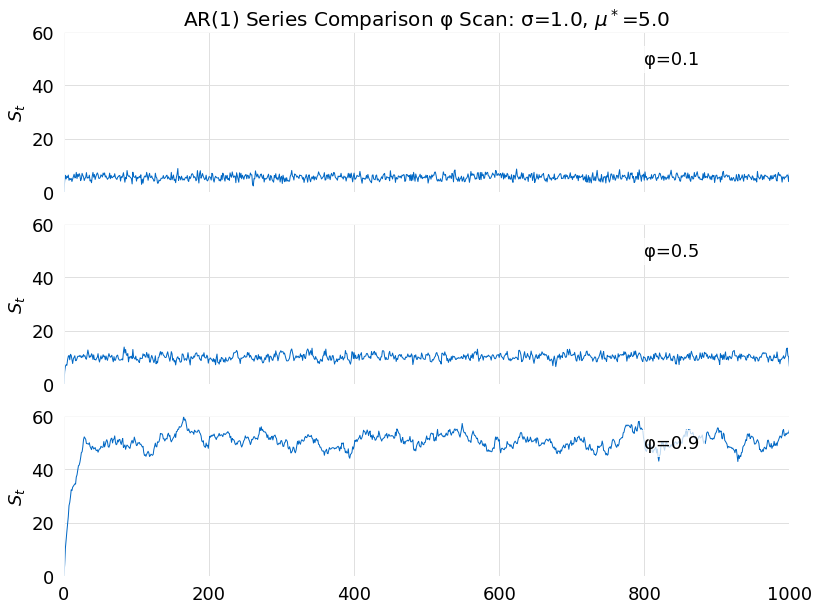

In [3]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ_vals = [0.1, 0.5, 0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [0.0, 60.0], title, *params)

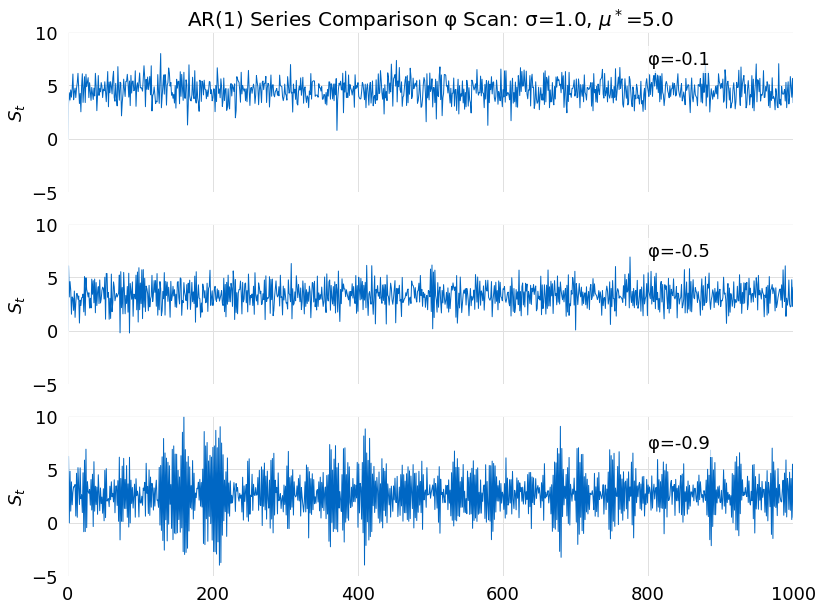

In [4]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ_vals = [-0.1, -0.5, -0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [-5.0, 10.0], title, *params)

## Simulation $\mu^*$ Scan

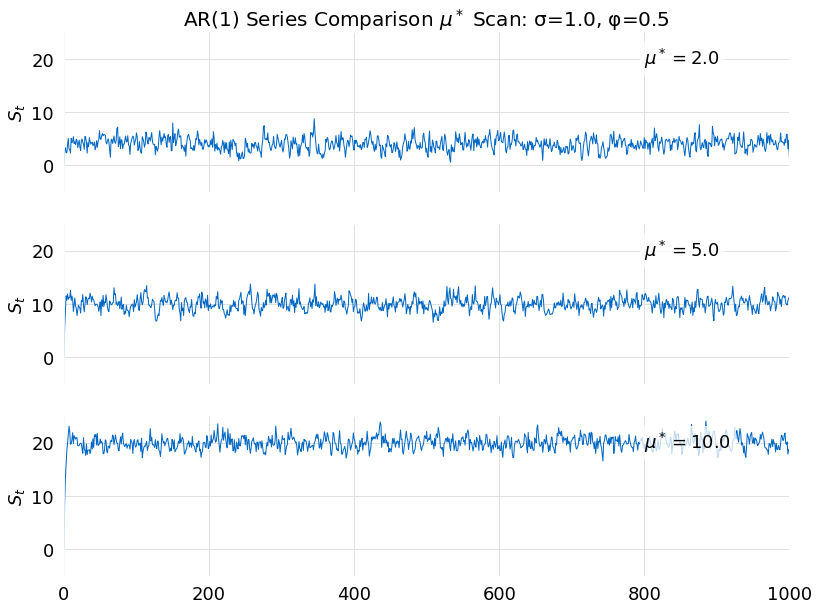

In [5]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [2.0, 5.0, 10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-5.0, 25.0], title, *params)

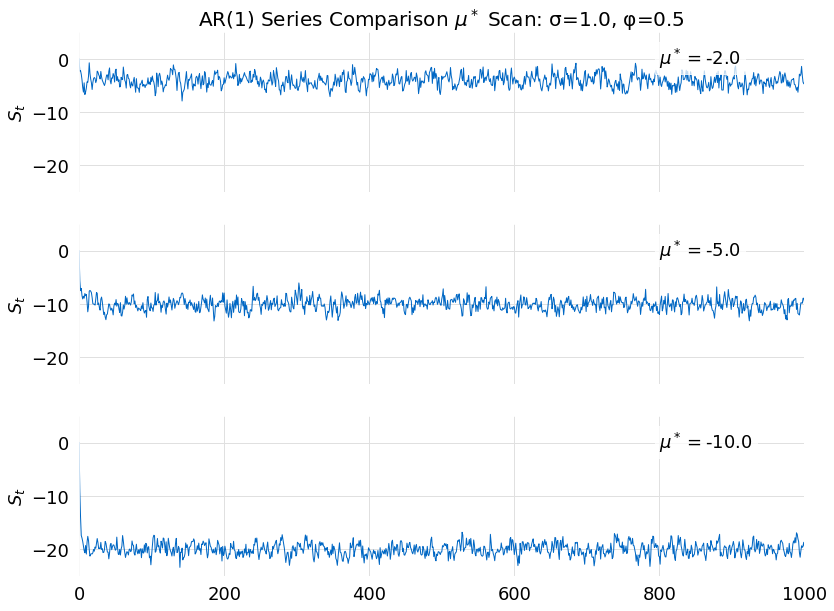

In [6]:
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [-2.0, -5.0, -10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-25.0, 5.0], title, *params)

## Mean

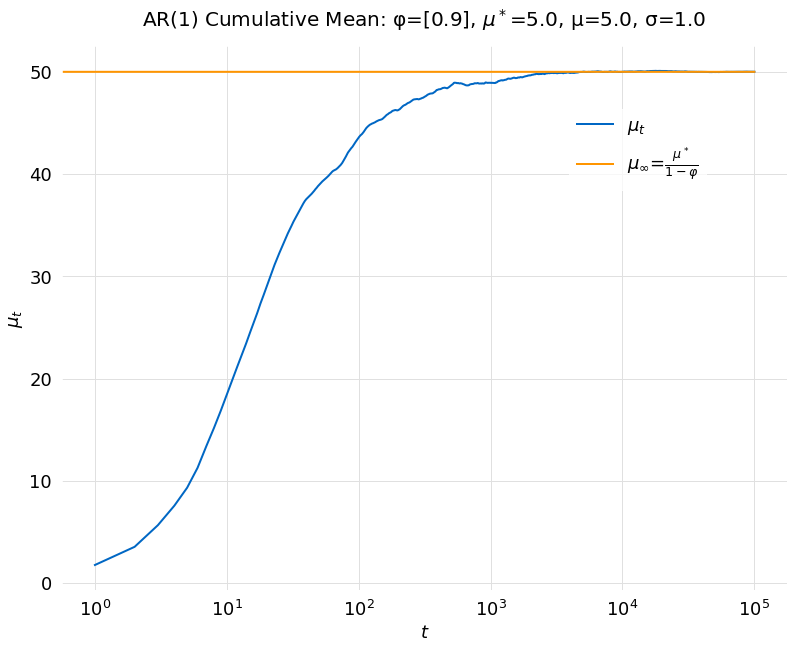

In [7]:
φ = 0.9
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

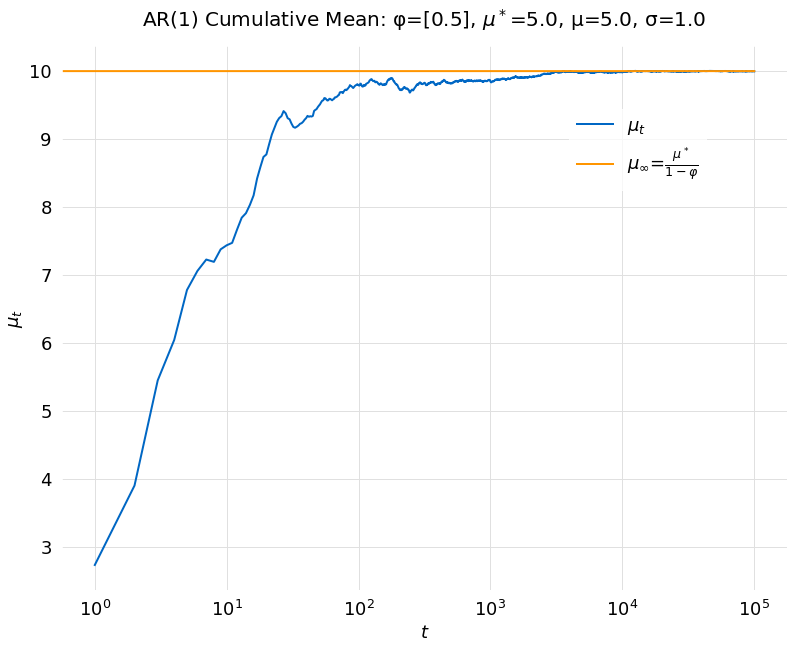

In [8]:
φ = 0.5
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

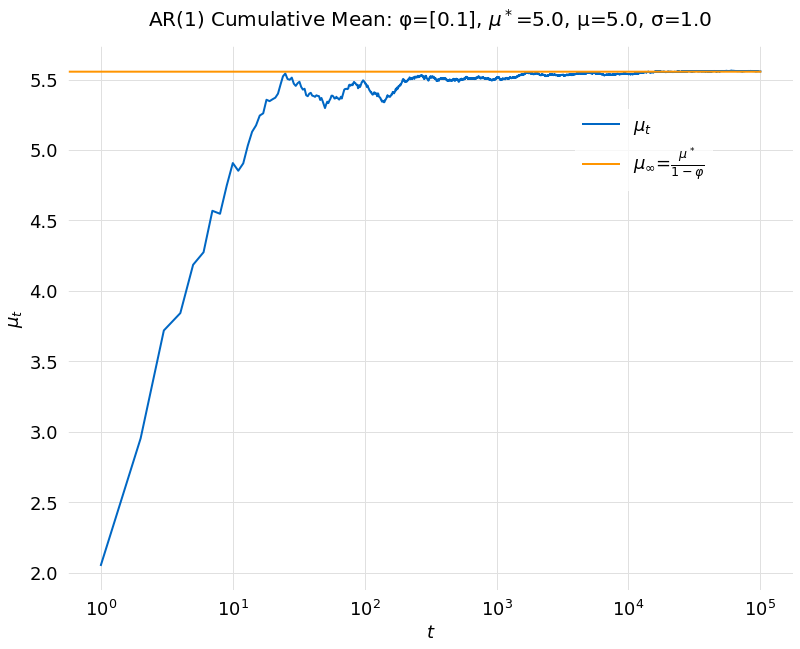

In [9]:
φ = 0.1
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

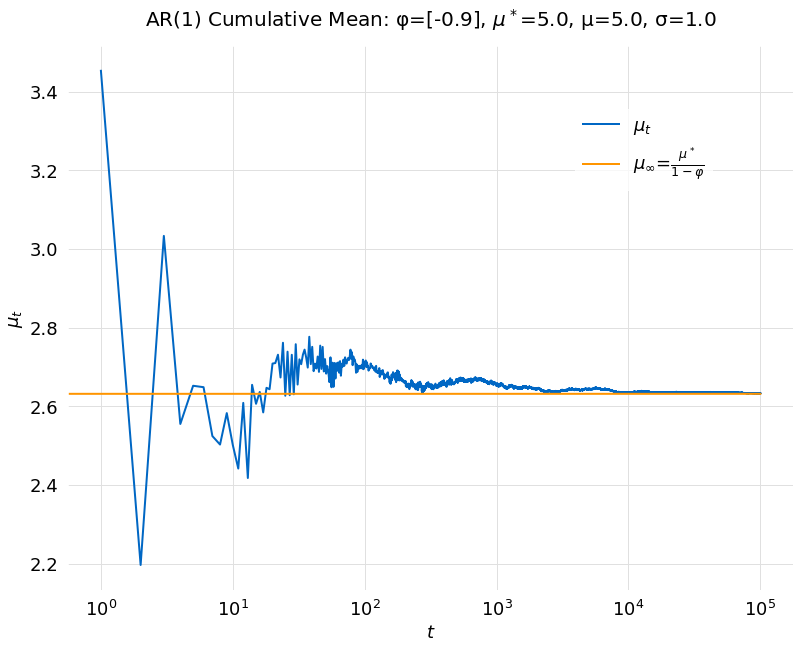

In [10]:
φ = -0.9
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

## Standard Deviation

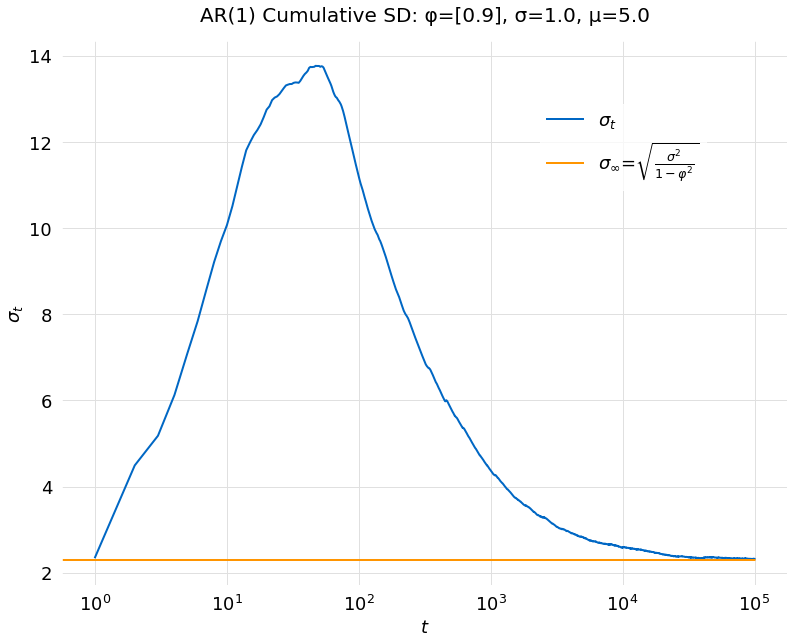

In [11]:
φ = 0.9
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

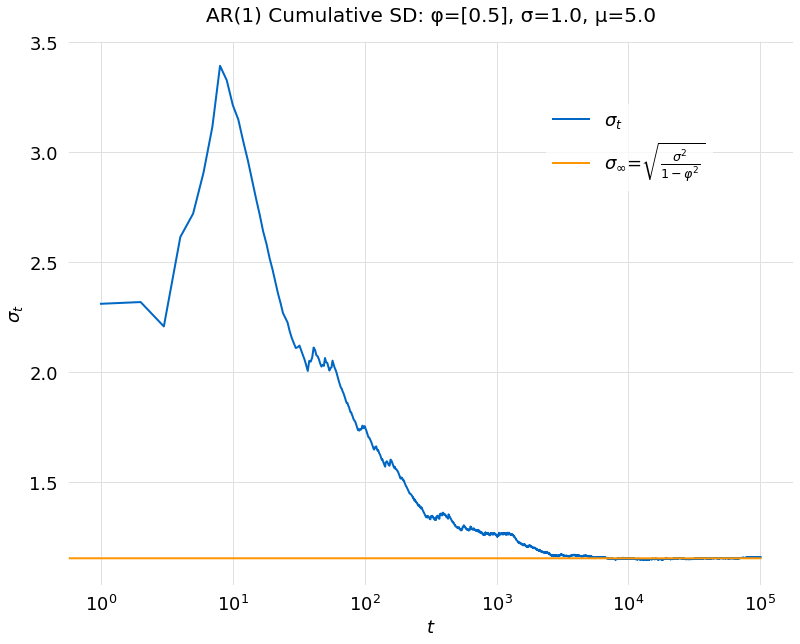

In [12]:
φ = 0.5
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

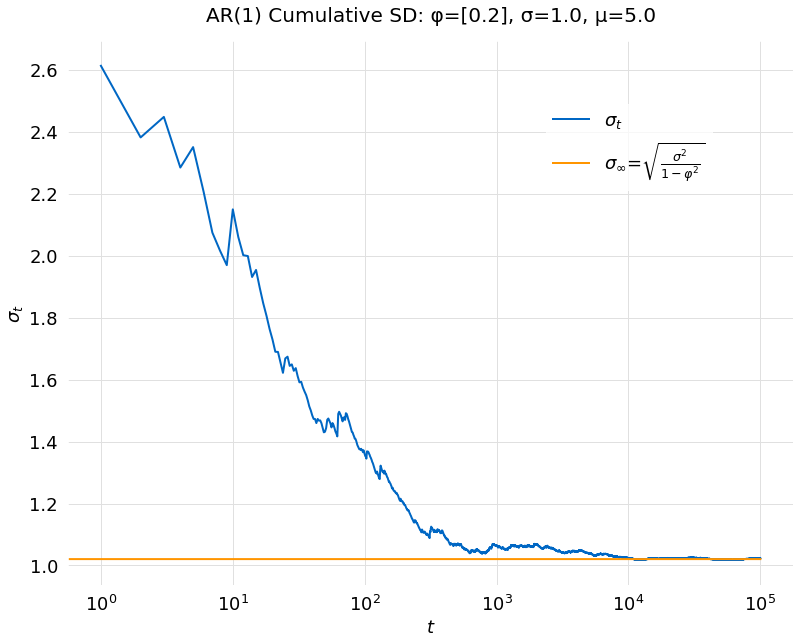

In [13]:
φ = 0.2
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

## Parameter Estimation

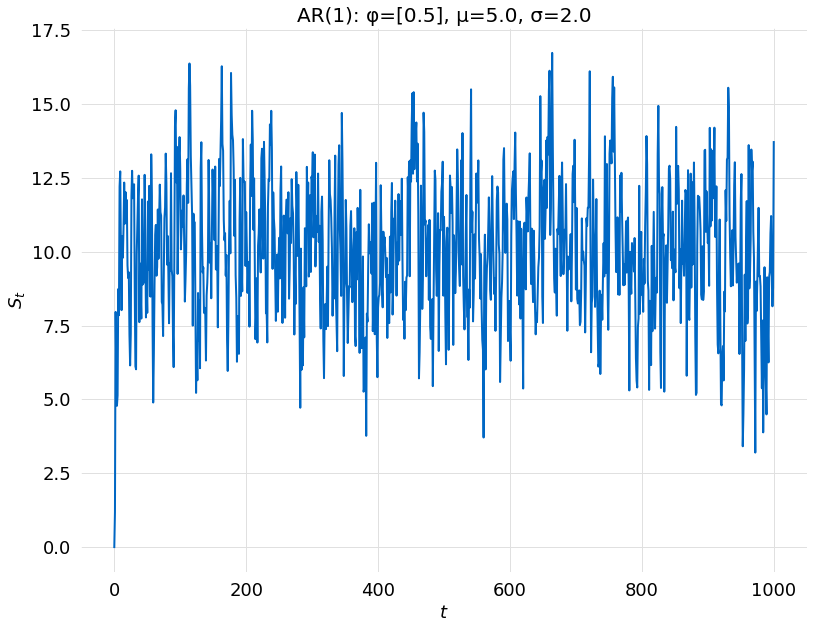

In [14]:
φ = 0.5
μ = 5.0
σ = 2.0
nsample = 1000
df = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, xmax=nsample)
curve(df, data_type=DataType.TIME_SERIES)

In [15]:
results = perform_est(df, EstType.AR_OFFSET, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2101.651
Date:                Sun, 15 May 2022   AIC                           4209.302
Time:                        18:17:56   BIC                           4224.028
Sample:                             0   HQIC                          4214.899
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0411      0.136     74.003      0.000       9.775      10.307
ar.L1          0.5450      0.025     21.621      0.000       0.496       0.594
sigma2         3.8995      0.179     21.826      0.000       3.549       4.250
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.82
Prob(Q):                              0.86   Prob(JB):                         0.66
Heteroskedasticity (H):               1.02   Skew:                            -0.06
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
df.attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.5], 'μ': 5.0, 'σ': 2.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <EstType.AR_OFFSET: 'AR_OFFSET'>,
    'Const': [10.041131285576936, 0.1356847569494609],
    'Parameters': [[0.545009491852042, 0.025207492611804907]],
    'Sigma2': [3.8995423167177705, 0.1786638292273782]}},
  'Tests': {}},
 'Date': '15/05/2022 18:17:55',
 'Name': 'AR(1)-Simulation-bbc5169b-81d9-43b6-b65b-62a049d00204'}

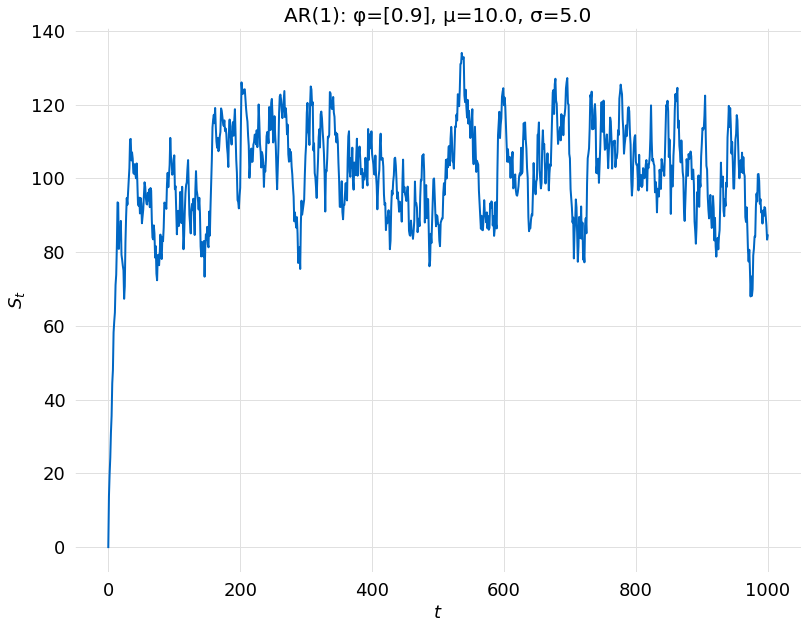

In [17]:
φ = 0.9
μ = 10.0
σ = 5.0
nsample = 1000
df = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, xmax=nsample)
curve(df, data_type=DataType.TIME_SERIES)

In [18]:
results = perform_est(df, EstType.AR_OFFSET, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3023.781
Date:                Sun, 15 May 2022   AIC                           6053.562
Time:                        18:17:56   BIC                           6068.288
Sample:                             0   HQIC                          6059.159
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.1613      3.701     26.524      0.000      90.908     105.415
ar.L1          0.9601      0.004    228.975      0.000       0.952       0.968
sigma2        24.5594      1.111     22.107      0.000      22.382      26.737
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                23.91
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.15
Prob(H) (two-sided):                  0.56   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
df.attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.9], 'μ': 10.0, 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <EstType.AR_OFFSET: 'AR_OFFSET'>,
    'Const': [98.16132777720371, 3.700873165590229],
    'Parameters': [[0.960140186833124, 0.0041932010859386465]],
    'Sigma2': [24.559379611110437, 1.1109564600171185]}},
  'Tests': {}},
 'Date': '15/05/2022 18:17:56',
 'Name': 'AR(1)-Simulation-4f195aa7-9dc1-40b0-b525-8a516279bd15'}

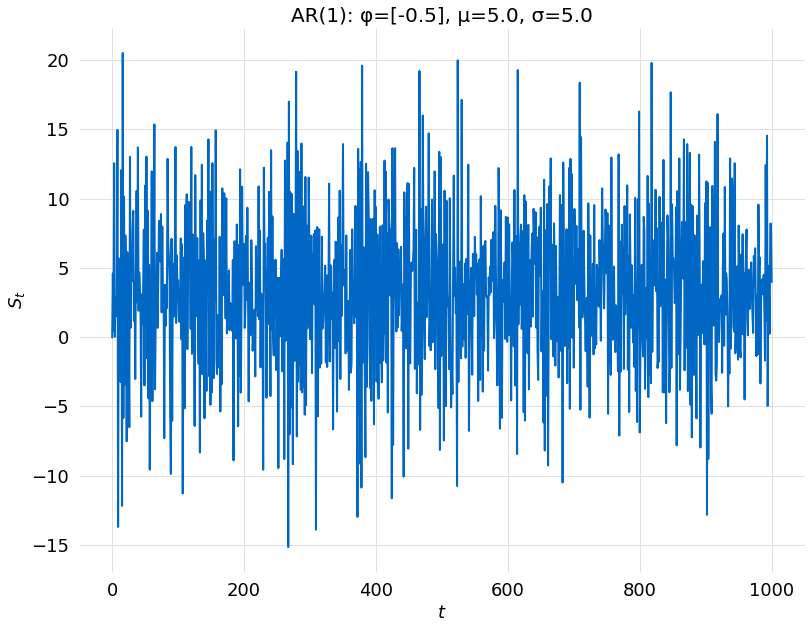

In [20]:
φ = -0.5
μ = 5.0
nsample = 1000
df = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, xmax=nsample)
curve(df, data_type=DataType.TIME_SERIES)

In [21]:
results = perform_est(df, EstType.AR_OFFSET, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3045.584
Date:                Sun, 15 May 2022   AIC                           6097.168
Time:                        18:17:56   BIC                           6111.894
Sample:                             0   HQIC                          6102.764
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2316      0.111     29.203      0.000       3.015       3.449
ar.L1         -0.4521      0.030    -15.307      0.000      -0.510      -0.394
sigma2        25.7124      1.100     23.365      0.000      23.556      27.869
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 3.11
Prob(Q):                              0.77   Prob(JB):                         0.21
Heteroskedasticity (H):               0.86   Skew:                            -0.10
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
df.attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [-0.5], 'μ': 5.0, 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <EstType.AR_OFFSET: 'AR_OFFSET'>,
    'Const': [3.231642281681381, 0.11066220844435969],
    'Parameters': [[-0.45212591223897286, 0.02953665940764086]],
    'Sigma2': [25.712447361383617, 1.1004562776768916]}},
  'Tests': {}},
 'Date': '15/05/2022 18:17:56',
 'Name': 'AR(1)-Simulation-f3ed7af4-0a42-404a-9c86-3a89f1681bad'}